## Data loading and exploration

In [1]:
# Importamos la libreria os
import os
# Importamos la libreria open cv
import cv2
# Importamos la libreria numpy
import numpy as np
# Importamos Image de la libreria PIL
from PIL import Image
# Importamos la libreria matplotlib
import matplotlib.pyplot as plt
# Importamos train_test_split de la libreria sklearn
from sklearn.model_selection import train_test_split
# Preparamos el ambiente
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 
# Importamos keras de la libreria tensorflow
from tensorflow import keras
# Importamos Sequential de la libreria keras
from keras.models import Sequential
# Importamos Conv2D,MaxPooling2D,Dense,Flatten,Dropout de la libreria keras
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
# Importamos BatchNormalization de la libreria tensorflow
from tensorflow.keras.layers import BatchNormalization
# Importamos la libreria tensorflow
import tensorflow as tf
# Importamos la libreria visualkeras
import visualkeras
# Importamos early stopping
from keras.callbacks import EarlyStopping
# Importamos pickle
import pickle 

In [2]:
# Inicializamos batch_size
batch_size = 32

In [3]:
# Definimos la ruta de las imagenes
fpath = 'C:\IAU3\Fotos_RemovedBG'
# Inicializamos random_seed
random_seed = 9
# Obtenemos las categorias
categories = os.listdir(fpath)
# Mostramos las categorias
print("List of categories = ",categories,"\n\nNo. of categories = ", len(categories))

List of categories =  ['Ariel Chabla', 'ArroboMercy', 'BarraganSteven', 'CevallosJoan', 'EnriquezSelena', 'GenesisHeredia', 'GoyesAnthony', 'HectorCedenio', 'Jhon Zambrano', 'Jordan Espinosa', 'Jorge Borrero', 'JoseRuiz', 'LucioCarlos', 'MasacheFernando', 'MelanyLopez', 'MosqueraLucy', 'Nataly Acosta', 'OlallaLuis', 'ParragaMariaJose', 'PauteKevin', 'Raymond Davila', 'RivasSelena', 'SalazarJohana', 'Solano Wilmer', 'SolorzanoBryan', 'VinicioBorja'] 

No. of categories =  26


In [4]:
 """
    Este método permite recorrer los elementos obtenidos de la ruta especificada a través de su categoria.

    Parametros
    -----------
        categories (str): Indica la ruta de cada categoria existente en la carpeta de origen.
        

    Returns:
        img_lst: Retorna la lista de imagenes
        labels: Retorna la lista etiquetas.
"""
def load_images_and_labels(categories):
    # Instanciamos la lista de imagenes
    img_lst=[]
    # Instanciamos la lista de etiquetas
    labels=[]
    # Bucle que recorre las categorias
    for index, category in enumerate(categories):
        # Bucle que recorre la ruta de las imagenes
        for image_name in os.listdir(fpath+"/"+category):
            # Leer las imagenes
            img = cv2.imread(fpath+"/"+category+"/"+image_name)
            # Transformamos el espacio de color de las imagenes
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            # Genera una arreglo con las imagenes y su formato
            img_array = Image.fromarray(img, 'RGB')
            # Añadimos la imagen a la lista
            img_lst.append(np.array(img_array))
            # Agregamos el indice a las etiquetas
            labels.append(index)
    #Retornamos la lista de imagenes y etiquetas
    return img_lst, labels

# Cargamos las imagenes y las etiquetas
images, labels = load_images_and_labels(categories)
# Mostramos la cantidad de imagenes y etiquetas cargadas
print("No. of images loaded = ",len(images),"\nNo. of labels loaded = ",len(labels))
# Mostramos el tipo de arreglo creado
print(type(images),type(labels))

No. of images loaded =  2511 
No. of labels loaded =  2511
<class 'list'> <class 'list'>


In [5]:
# Asignamos las medidas de las imagenes
images = np.array(images)
# Asignamos las etiquetas
labels = np.array(labels)
# Imprimimos las medidas de las imagenes y las etiquetas
print("Images shape = ",images.shape,"\nLabels shape = ",labels.shape)
# Imprimimos el tipo de arreglo generado
print(type(images),type(labels))

Images shape =  (2511, 192, 192, 3) 
Labels shape =  (2511,)
<class 'numpy.ndarray'> <class 'numpy.ndarray'>


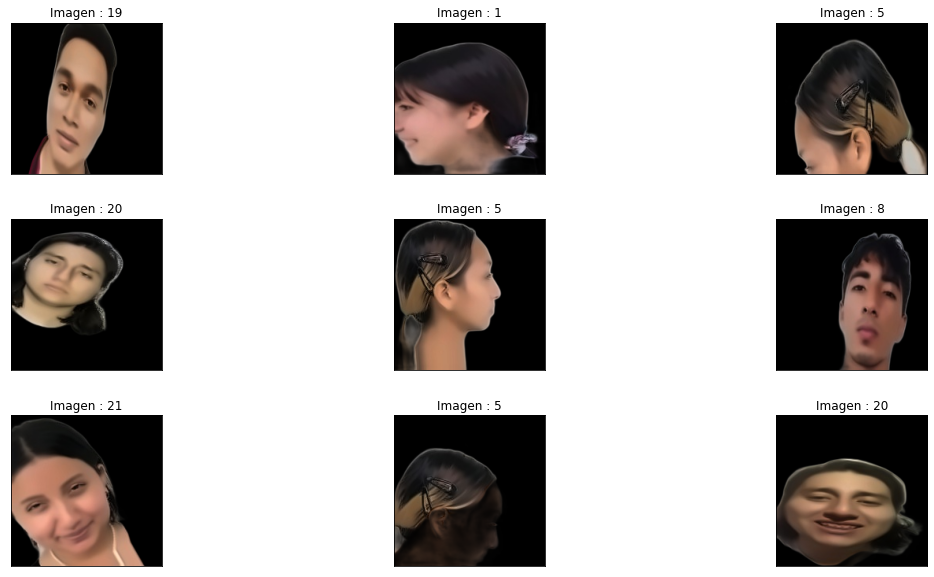

In [46]:
 """
    Este método permite mostrar imagenes de forma aleatoria.

    Parametros
    -----------
        images []: Lista de imagenes cargadas.
        labels []: Lista de etiquétas.
"""
def display_rand_images(images, labels):
    # Definimos la escala de las figuras
    plt.figure(1 , figsize = (19 , 10))
    # Inicializamos un contador
    n = 0 
    # Bucle que recorre 9 veces
    for i in range(9):
        # Incremento del contador
        n += 1 
        # Obtenemos un numero aleatorio
        r = np.random.randint(0 , images.shape[0] , 1)
        # Establecemos la forma de presentar las imagenes
        plt.subplot(3 , 3 , n)
        # Ajustamos la forma de mostrar las imagenes
        plt.subplots_adjust(hspace = 0.3 , wspace = 0.3)
        # Mostramos las imagenes
        plt.imshow(images[r[0]])
        # Definimos la etiqueta de las imagenes
        plt.title('Imagen : {}'.format(labels[r[0]]))
        # Establecemos la medida x
        plt.xticks([])
        # Establecemos la medida y
        plt.yticks([])
    #Mostramos la gráfica generada
    plt.show()
    
# LLamamos al metodo para mostrar las imagenes
display_rand_images(images, labels)

## Preparación de la Data para el entrenamiento del modelo CNN

In [7]:
#obtener números igualmente espaciados en un rango dado
n = np.arange(images.shape[0])
# Mostramos los valores
print("'n' Valores antes de reorganizarlos = ",n)

# llamamos a la función random_seed
np.random.seed(random_seed)
#mezclar todos los valores igualmente espaciados en la lista 'n'
np.random.shuffle(n)
# Mostramos los valores despues de reorganizarlos 
print("\n'n' Valores después de reorganizarlos = ",n)

'n' Valores antes de reorganizarlos =  [   0    1    2 ... 2508 2509 2510]

'n' Valores después de reorganizarlos =  [1536  231 2024 ...  501  348  382]


In [8]:
# Imágenes aleatorias y datos de etiquetas correspondientes a la lista de imagenes
images = images[n]
# Imágenes aleatorias y datos de etiquetas correspondientes a la lista de etiquetas
labels = labels[n]
# Impromimos los detalles de ambas listas
print("Images shape after shuffling = ",images.shape,"\nLabels shape after shuffling = ",labels.shape)

Images shape after shuffling =  (2511, 192, 192, 3) 
Labels shape after shuffling =  (2511,)


In [9]:
# Cambiamos el formato de las imagenes
images = images.astype(np.float32)
# Cambiamos el formato de las etiquetas
labels = labels.astype(np.int32)
# Dividimos el valor de las imagenes para 255
images = images/255
# Mostramos el valor de las imagenes después de normalizarlas
print("Forma de las imágenes después de normalizarlas = ",images.shape)

Forma de las imágenes después de normalizarlas =  (2511, 192, 192, 3)


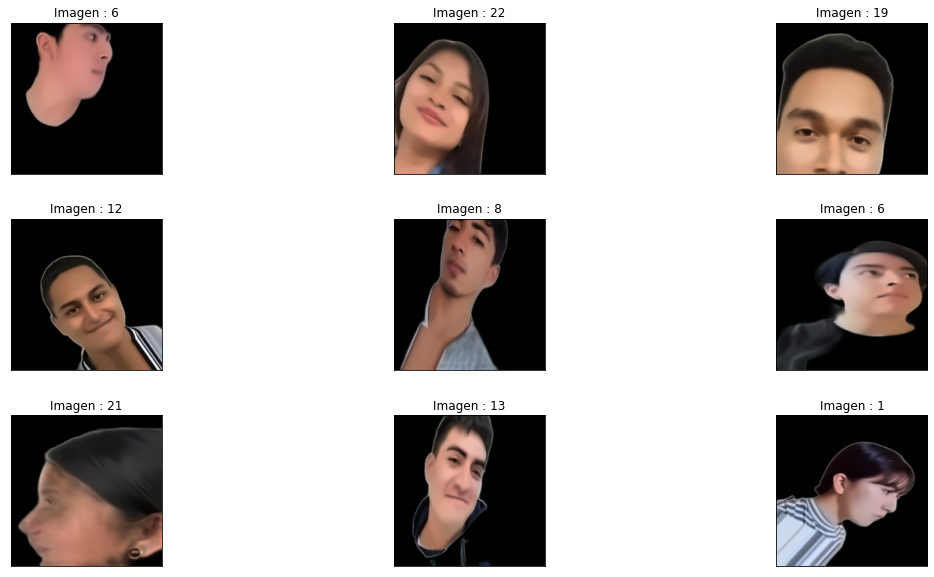

In [10]:
# Mostramos las imagenes de manera aleatoria
display_rand_images(images, labels)

In [20]:
# Definimos los datos de entrenamiento y prueba
train_ds, test_ds, train_labels, test_labels = train_test_split(images, labels, test_size = 0.2, random_state = random_seed)
# Mostramos la forma de las imágenes de entrenamiento
print("train_ds shape = ",train_ds.shape)
# Mostramos la forma de las etiquetas de entrenamiento
print("train_labels shape = ",train_labels.shape)
# Mostramos la forma de las imágenes de prueba
print("\ntest_ds shape = ",test_ds.shape)
# Mostramos la forma de las etiquetas de prueba
print("test_labels shape = ",test_labels.shape)

train_ds shape =  (2008, 192, 192, 3)
train_labels shape =  (2008,)

test_ds shape =  (503, 192, 192, 3)
test_labels shape =  (503,)


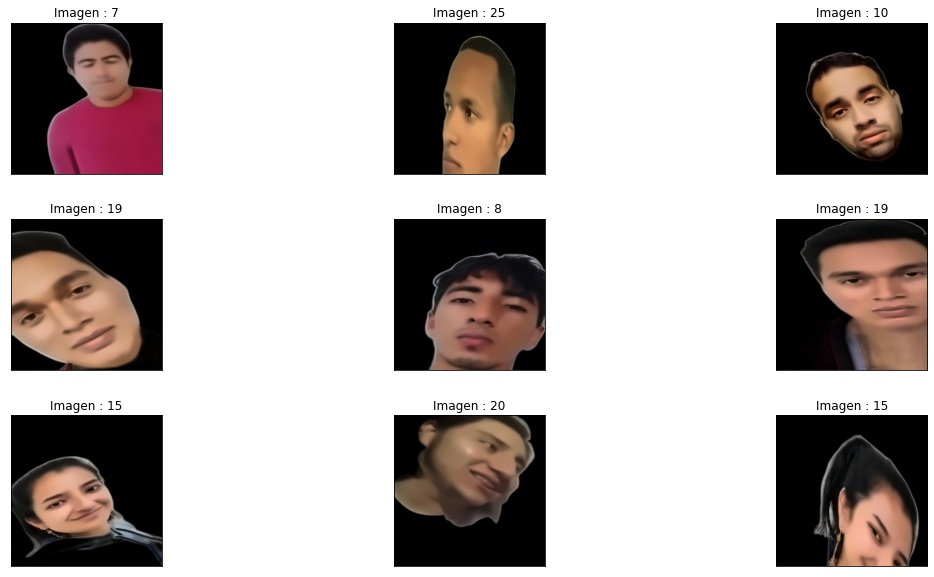

In [21]:
# Mostramos imagenes de entrenamiento de manera aleatoria
display_rand_images(train_ds, train_labels)

In [22]:
## Redimencionamos las imagenes de entrenamiento
train_ds = tf.image.resize(train_ds, (227, 227))
## Redimencionamos las imagenes de prueba
test_ds = tf.image.resize(test_ds, (227, 227))

# Early Stooping

In [23]:
# early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=200)

# Modelo AlexNet CNN - Prueba 1
## Definición de las capas AlexNET CNN

In [28]:
# Instanciamos el modelo
model=Sequential()

#Agregamos la primera capa convolucional
model.add(Conv2D(filters=96,kernel_size=(11,11),strides=(4,4),padding="valid",activation="relu",input_shape=(227,227,3)))

#Agregamos la primera capa max pool
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))

# Agregamos la normalización al modelo
model.add(BatchNormalization())

#Agregamos la segunda capa convolucional
model.add(Conv2D(filters=256,kernel_size=(5,5),strides=(1,1),padding="valid",activation="relu"))

#Agregamos la segunda capa max pool
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))
# Agregamos la normalización al modelo
model.add(BatchNormalization())

#Agregamos la tercera capa convolucional
model.add(Conv2D(filters=384,kernel_size=(3,3),strides=(1,1),padding="valid",activation="relu"))

#Agregamos la cuarta capa convolucional
model.add(Conv2D(filters=384,kernel_size=(3,3),strides=(1,1),padding="valid",activation="relu"))

#Agregamos la quinta capa convolucional
model.add(Conv2D(filters=256,kernel_size=(3,3),strides=(1,1),padding="valid",activation="relu"))

#Agregamos la tercera capa max pool
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))
# Agregamos la normalización al modelo
model.add(BatchNormalization())

# Redimencionamos el modelo
model.add(Flatten())

#Añadimos la primera capa de densidad
model.add(Dense(4096,input_shape=(227,227,3),activation="relu"))
# Omitir aleatoriamente neuronas
model.add(Dropout(0.4))
# Normalizamos el modelo
model.add(BatchNormalization())

# Añadimos la segunda capa de densidad
model.add(Dense(4096,activation="relu"))
# Omitir aleatoriamente neuronas
model.add(Dropout(0.4))
# Normalizamos el modelo
model.add(BatchNormalization())

# Añadimos la tercera capa de densidad
model.add(Dense(1000,activation="relu"))
# Omitir aleatoriamente neuronas
model.add(Dropout(0.4))
# Normalizamos el modelo
model.add(BatchNormalization())

# Capa de salida
model.add(Dense(26,activation="softmax"))
# Resumen del modelo
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 55, 55, 96)        34944     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 27, 27, 96)       0         
 2D)                                                             
                                                                 
 batch_normalization_12 (Bat  (None, 27, 27, 96)       384       
 chNormalization)                                                
                                                                 
 conv2d_11 (Conv2D)          (None, 23, 23, 256)       614656    
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 11, 11, 256)      0         
 2D)                                                             
                                                      

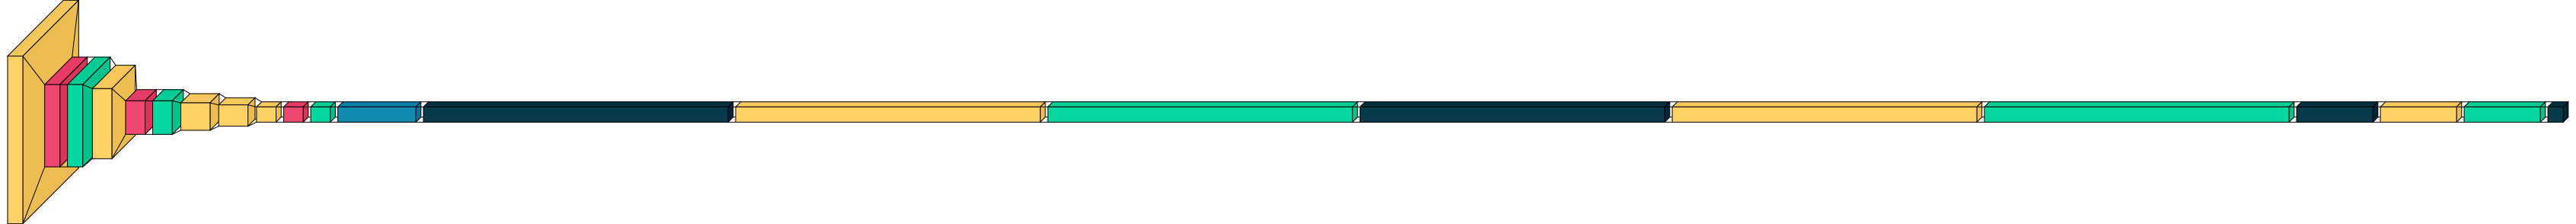

In [29]:
# Grafica del modelo generado
visualkeras.layered_view(model)

## Compilación del modelo CNN

In [30]:
# Compilamos el modelo
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

## Entrenamiento del modelo

In [ ]:
#Marca de tiempo
%time
# Entrenamiento del modelo
history = model.fit(train_ds, train_labels, epochs=50, validation_split=0.2, callbacks= [es])


Wall time: 999 µs
Epoch 1/50
51/51 [==============================] - 131s 3s/step - loss: 0.7223 - accuracy: 0.7733 - val_loss: 1.8846 - val_accuracy: 0.5647
Epoch 2/50
51/51 [==============================] - 183s 4s/step - loss: 0.5696 - accuracy: 0.8120 - val_loss: 2.8376 - val_accuracy: 0.4303
Epoch 3/50
51/51 [==============================] - 204s 4s/step - loss: 0.6274 - accuracy: 0.8020 - val_loss: 4.2795 - val_accuracy: 0.3184
Epoch 4/50
51/51 [==============================] - 161s 3s/step - loss: 0.4545 - accuracy: 0.8462 - val_loss: 1.0798 - val_accuracy: 0.6667
Epoch 5/50
51/51 [==============================] - 153s 3s/step - loss: 0.4197 - accuracy: 0.8605 - val_loss: 1.3664 - val_accuracy: 0.6667
Epoch 6/50
15/51 [=======>......................] - ETA: 1:46 - loss: 0.4116 - accuracy: 0.8521

In [ ]:
# Guardamos el modelo entrenado
convert = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = convert.convert()

with open("model_v3.tflite", 'wb') as f:
    f.write(tflite_model)

## Evaluación del modelo

In [ ]:
# Evaluamos el modelo
loss, accuracy = model.evaluate(test_ds, test_labels)
# Mostramos los paquetes perdidos y el accuracy
print(loss,accuracy)

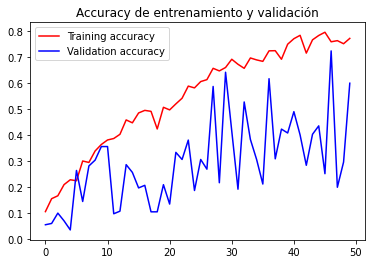

<Figure size 432x288 with 0 Axes>

In [36]:
# Obtenemos el accuracy del modelo
accuracy = history.history['accuracy']
# Obtenemos el accuracy de validación
validation_accuracy = history.history['val_accuracy']
# Determinamos los puntos de graficación
epochs = range(len(accuracy))
# Graficamos la metrica del accuracy
plt.plot(epochs, accuracy, 'r', label='Training accuracy')
# Graficamos la metrica del accuracy de validación
plt.plot(epochs, validation_accuracy, 'b', label='Validation accuracy')
# Asignamos el titulo del gráfico
plt.title('Accuracy de entrenamiento y validación')
# Asignamos la legenda del grafico
plt.legend(loc=0)
# Creamos la figura
plt.figure()
# Mostramos la figura
plt.show()

## Predicción mediante el modelo entrenado

In [37]:
# Enviamos los datos de predicción
pred = model.predict(test_ds)
# Tamaño de las predicciones
pred.shape

(503, 26)

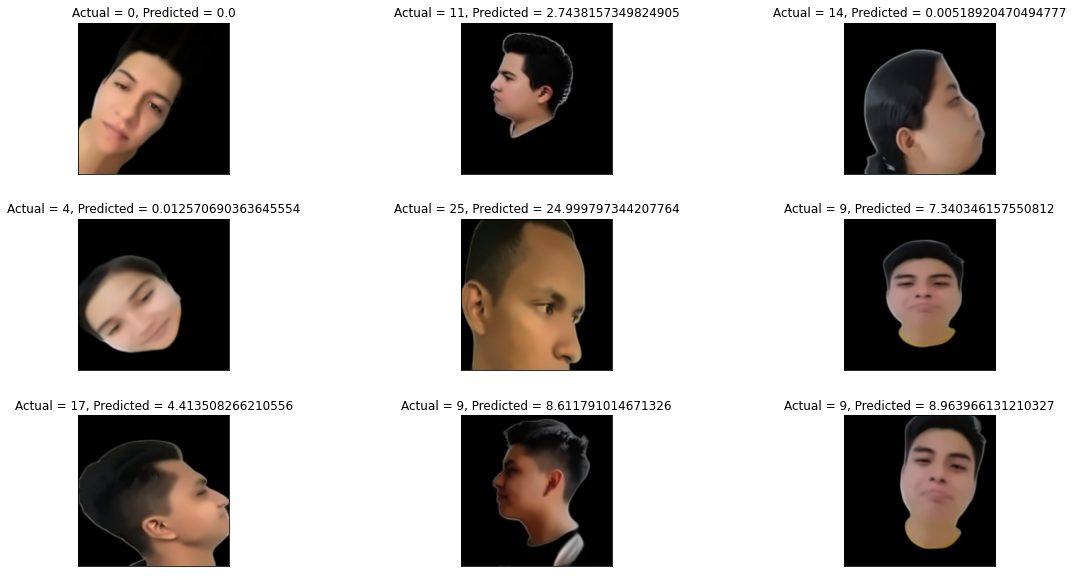

In [40]:
# Definir el tamaño de las figuras
plt.figure(1 , figsize = (19 , 10))
# Definimos un contador
n = 0 
# Bucle para mostrar las imagenes
for i in range(9):
    # Incrementamos el contador
    n += 1 
    # Obtenemos una imagen aleatoria
    r = np.random.randint( 0, test_ds.shape[0], 1)
    # Establecemos la forma de presentar las imagenes
    plt.subplot(3 , 3 , n)
    # Ajustamos la forma de mostrar las imagenes
    plt.subplots_adjust(hspace = 0.3, wspace = 0.3)
    # obtenemos la imagen actual para mostrar
    plt.imshow(test_ds[r[0]])
    # Asignamos las etiquetas
    plt.title('Actual = {}, Predicted = {}'.format(test_labels[r[0]] , test_labels[r[0]]*pred[r[0]][test_labels[r[0]]]) )
    # Establecemos la medida x, y
    plt.xticks([]) , plt.yticks([])

# Mostramos la gráfica
plt.show()

# Modelo AlexNet CNN - Prueba 2
## Definición de las capas AlexNET CNN

In [29]:
# Instanciamos el modelo
model2=Sequential()

#Agregamos la primera capa convolucional
model2.add(Conv2D(filters=96,kernel_size=(11,11),strides=(4,4),padding="valid",activation="relu",input_shape=(227,227,3)))

#Agregamos la primera capa max pool
model2.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))

# Agregamos la normalización al modelo
model2.add(BatchNormalization())

#Agregamos la segunda capa convolucional
model2.add(Conv2D(filters=256,kernel_size=(5,5),strides=(1,1),padding="valid",activation="relu"))

#Agregamos la segunda capa max pool
model2.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))
# Agregamos la normalización al modelo
model2.add(BatchNormalization())

#Agregamos la tercera capa convolucional
model2.add(Conv2D(filters=384,kernel_size=(3,3),strides=(1,1),padding="valid",activation="relu"))

#Agregamos la cuarta capa convolucional
model2.add(Conv2D(filters=384,kernel_size=(3,3),strides=(1,1),padding="valid",activation="relu"))

#Agregamos la quinta capa convolucional
model2.add(Conv2D(filters=256,kernel_size=(3,3),strides=(1,1),padding="valid",activation="relu"))

#Agregamos la tercera capa max pool
model2.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))
# Agregamos la normalización al modelo
model2.add(BatchNormalization())

# Redimencionamos el modelo
model2.add(Flatten())

#Añadimos la primera capa de densidad
model2.add(Dense(4096,input_shape=(227,227,3),activation="relu"))
# Omitir aleatoriamente neuronas
model2.add(Dropout(0.4))
# Normalizamos el modelo
model2.add(BatchNormalization())

# Añadimos la segunda capa de densidad
model2.add(Dense(4096,activation="relu"))
# Omitir aleatoriamente neuronas
model2.add(Dropout(0.4))
# Normalizamos el modelo
model2.add(BatchNormalization())

# Añadimos la tercera capa de densidad
model2.add(Dense(1000,activation="relu"))
# Omitir aleatoriamente neuronas
model2.add(Dropout(0.4))
# Normalizamos el modelo
model2.add(BatchNormalization())

# Capa de salida
model2.add(Dense(20,activation="softmax"))
# Resumen del modelo
model2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 55, 55, 96)        34944     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 27, 27, 96)       0         
 2D)                                                             
                                                                 
 batch_normalization_12 (Bat  (None, 27, 27, 96)       384       
 chNormalization)                                                
                                                                 
 conv2d_16 (Conv2D)          (None, 23, 23, 256)       614656    
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 11, 11, 256)      0         
 g2D)                                                            
                                                      

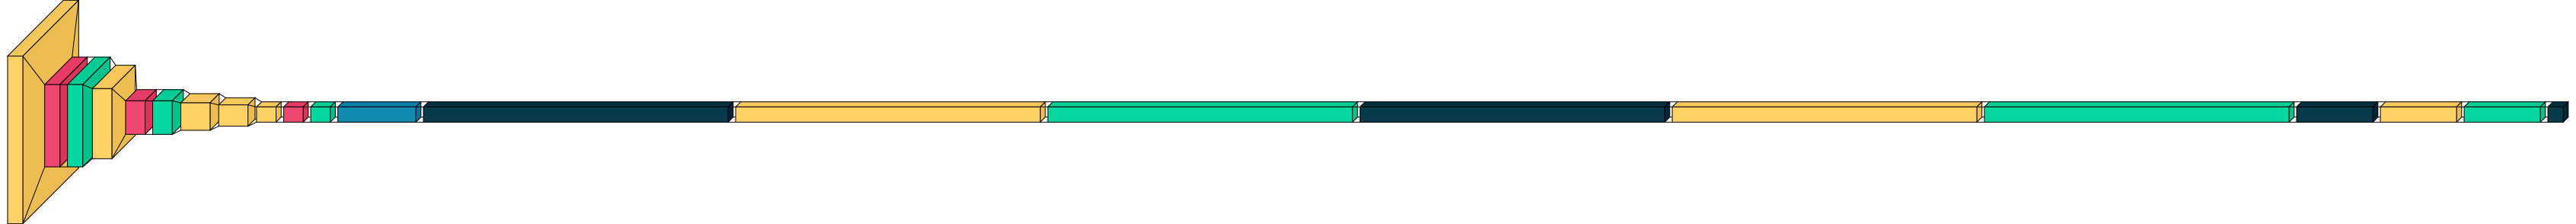

In [30]:
# Grafica del modelo generado
visualkeras.layered_view(model2)

 ## Compilación del modelo

In [32]:
# Compilamos el modelo
model2.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

## Entrenamiento del modelo

In [34]:
# Definimos la técnica de generalización
callback = EarlyStopping(monitor='loss', patience=3)
#Marca de tiempo
%time
# Entrenamiento del modelo
history2 = model2.fit(train_ds, train_labels, epochs=50, validation_split=0.2, callbacks=[callback])

Wall time: 0 ns
Epoch 1/50
4/4 [==============================] - 9s 2s/step - loss: 0.7590 - accuracy: 0.8476 - val_loss: 199.8542 - val_accuracy: 0.3333
Epoch 2/50
4/4 [==============================] - 8s 2s/step - loss: 0.4759 - accuracy: 0.9048 - val_loss: 135.0434 - val_accuracy: 0.3333
Epoch 3/50
4/4 [==============================] - 8s 2s/step - loss: 0.4495 - accuracy: 0.8952 - val_loss: 120.5778 - val_accuracy: 0.3333
Epoch 4/50
4/4 [==============================] - 8s 2s/step - loss: 0.3117 - accuracy: 0.8952 - val_loss: 111.4828 - val_accuracy: 0.3333
Epoch 5/50
4/4 [==============================] - 8s 2s/step - loss: 0.2828 - accuracy: 0.8952 - val_loss: 93.9687 - val_accuracy: 0.3333
Epoch 6/50
4/4 [==============================] - 8s 2s/step - loss: 0.2727 - accuracy: 0.8857 - val_loss: 74.1627 - val_accuracy: 0.3333
Epoch 7/50
4/4 [==============================] - 9s 2s/step - loss: 0.3408 - accuracy: 0.8857 - val_loss: 57.7815 - val_accuracy: 0.3333
Epoch 8/50
4/4

## Evaluación del modelo

In [35]:
# Evaluamos el modelo
loss, accuracy = model2.evaluate(test_ds, test_labels)
# Mostramos los paquetes perdidos y el accuracy
print(loss,accuracy)

2/2 [==============================] - 0s 35ms/step - loss: 43.6255 - accuracy: 0.3333
43.62547302246094 0.3333333432674408


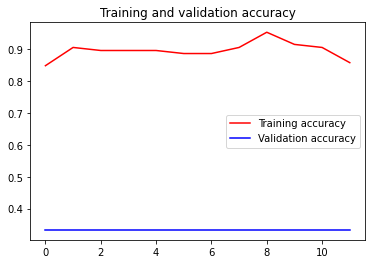

<Figure size 432x288 with 0 Axes>

In [36]:
# Obtenemos el accuracy del modelo
accuracy = history2.history['accuracy']
# Obtenemos el accuracy de validación
validation_accuracy = history2.history['val_accuracy']
# Determinamos los puntos de graficación
epochs = range(len(accuracy))
# Graficamos la metrica del accuracy
plt.plot(epochs, accuracy, 'r', label='Training accuracy')
# Graficamos la metrica del accuracy de validación
plt.plot(epochs, validation_accuracy, 'b', label='Validation accuracy')
# Asignamos el titulo del gráfico
plt.title('Accuracy de entrenamiento y validación')
# Asignamos la legenda del grafico
plt.legend(loc=0)
# Creamos la figura
plt.figure()
# Mostramos la figura
plt.show()

## Predicción mediante el modelo entrenado

In [37]:
# Enviamos los datos de predicción
pred2 = model2.predict(test_ds)
# Tamaño de las predicciones
pred2.shape

(33, 20)

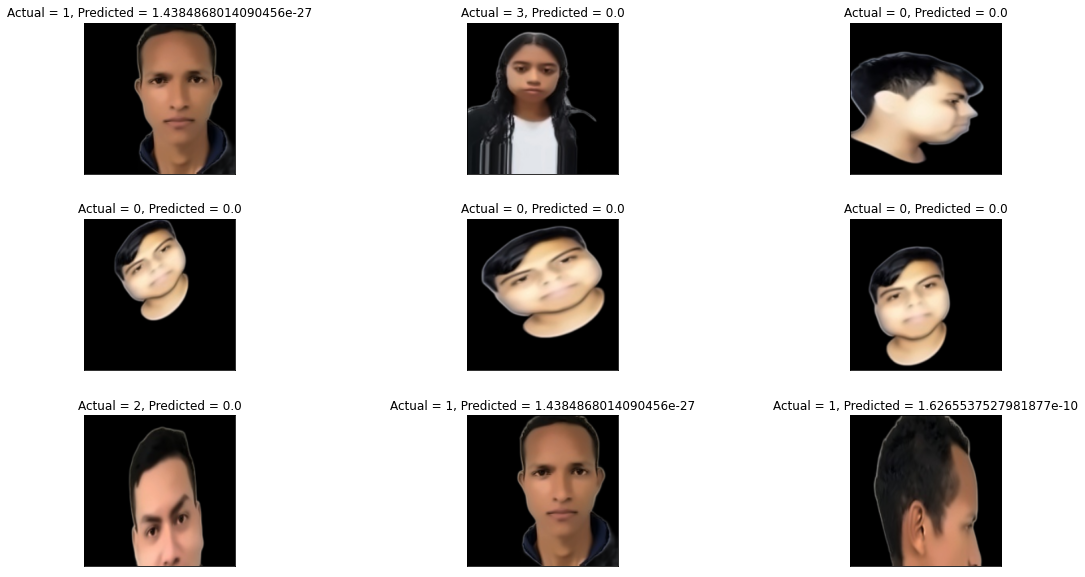

In [38]:
# Definir el tamaño de las figuras
plt.figure(1 , figsize = (19 , 10))
# Definimos un contador
n = 0 
# Bucle para mostrar las imagenes
for i in range(9):
    # Incrementamos el contador
    n += 1 
    # Obtenemos una imagen aleatoria
    r = np.random.randint( 0, test_ds.shape[0], 1)
    # Establecemos la forma de presentar las imagenes
    plt.subplot(3 , 3 , n)
    # Ajustamos la forma de mostrar las imagenes
    plt.subplots_adjust(hspace = 0.3, wspace = 0.3)
    # obtenemos la imagen actual para mostrar
    plt.imshow(test_ds[r[0]])
    # Asignamos las etiquetas
    plt.title('Actual = {}, Predicted = {}'.format(test_labels[r[0]] , test_labels[r[0]]*pred2[r[0]][test_labels[r[0]]]) )
    # Establecemos la medida x, y
    plt.xticks([]) , plt.yticks([])

# Mostramos la gráfica
plt.show()

# Modelo AlexNet CNN - Prueba 3
## Definición de las capas AlexNET CNN

In [47]:
# Instanciamos el modelo
model3=Sequential()

#Agregamos la primera capa convolucional
model3.add(Conv2D(filters=96,kernel_size=(11,11),strides=(4,4),padding="valid",activation="relu",input_shape=(227,227,3)))

#Agregamos la primera capa max pool
model3.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))
# Agregamos la normalización al modelo
model3.add(BatchNormalization())

#Agregamos la segunda capa convolucional
model3.add(Conv2D(filters=256,kernel_size=(5,5),strides=(1,1),padding="valid",activation="relu"))

#Agregamos la segunda capa max pool
model3.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))
# Agregamos la normalización al modelo
model3.add(BatchNormalization())

#Agregamos la tercera capa max pool
model3.add(MaxPooling2D(pool_size=(3,3),strides=(1,1),padding="valid"))

#Agregamos la tercera capa convolucional
model3.add(Conv2D(filters=384,kernel_size=(3,3),strides=(1,1),padding="valid",activation="relu"))

#Agregamos la cuarta capa convolucional
model3.add(Conv2D(filters=256,kernel_size=(3,3),strides=(1,1),padding="valid",activation="relu"))

#Agregamos la cuarta capa max pool
model3.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))
# Agregamos la normalización al modelo
model3.add(BatchNormalization())


# Redimencionamos el modelo
model3.add(Flatten())

#Añadimos la primera capa de densidad
model3.add(Dense(4096,input_shape=(227,227,3),activation="relu"))
# Omitir aleatoriamente neuronas
model3.add(Dropout(0.4))
# Normalizamos el modelo
model3.add(BatchNormalization())

# Añadimos la segunda capa de densidad
model3.add(Dense(4096,activation="relu"))
# Omitir aleatoriamente neuronas
model3.add(Dropout(0.4))
# Normalizamos el modelo
model3.add(BatchNormalization())

# Añadimos la tercera capa de densidad
model3.add(Dense(1000,activation="relu"))
# Omitir aleatoriamente neuronas
model3.add(Dropout(0.4))
# Normalizamos el modelo
model3.add(BatchNormalization())

# Capa de salida
model3.add(Dense(20,activation="softmax"))
# Resumen del modelo
model3.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_45 (Conv2D)          (None, 55, 55, 96)        34944     
                                                                 
 max_pooling2d_33 (MaxPoolin  (None, 27, 27, 96)       0         
 g2D)                                                            
                                                                 
 batch_normalization_39 (Bat  (None, 27, 27, 96)       384       
 chNormalization)                                                
                                                                 
 conv2d_46 (Conv2D)          (None, 23, 23, 256)       614656    
                                                                 
 max_pooling2d_34 (MaxPoolin  (None, 11, 11, 256)      0         
 g2D)                                                            
                                                     

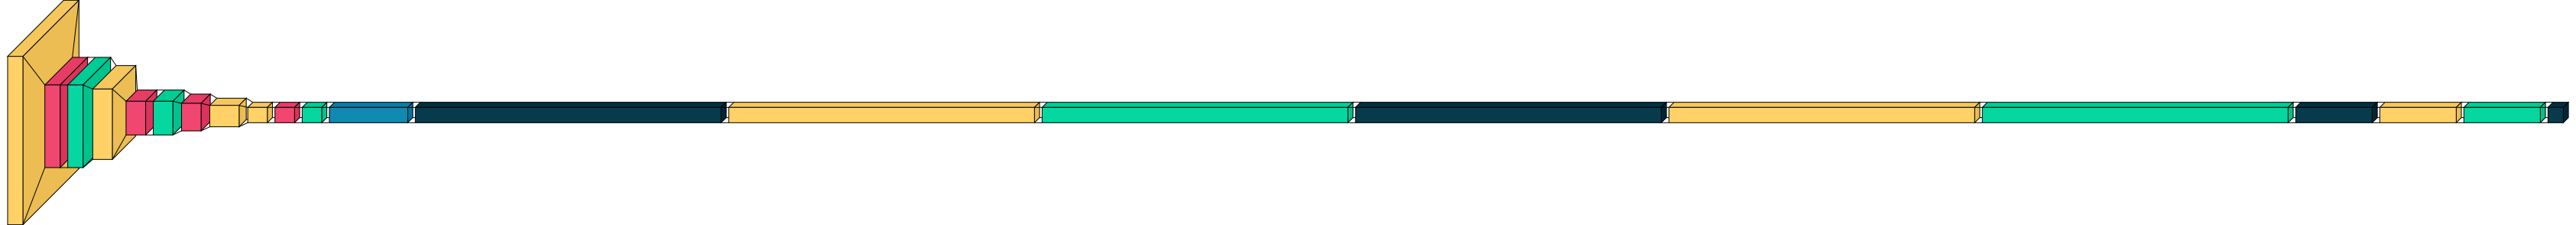

In [48]:
# Grafica del modelo generado
visualkeras.layered_view(model3)

## Compilación del modelo CNN

In [49]:
# Compilamos el modelo
model3.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

## Entrenamiento del modelo

In [50]:
#Marca de tiempo
%time
# Entrenamiento del modelo
history3 = model3.fit(train_ds, train_labels, epochs=50, validation_split=0.2)

Wall time: 0 ns
Epoch 1/50
4/4 [==============================] - 9s 2s/step - loss: 3.1112 - accuracy: 0.1905 - val_loss: 7.9479 - val_accuracy: 0.3333
Epoch 2/50
4/4 [==============================] - 6s 1s/step - loss: 1.6471 - accuracy: 0.6381 - val_loss: 127.8484 - val_accuracy: 0.3333
Epoch 3/50
4/4 [==============================] - 6s 1s/step - loss: 0.9153 - accuracy: 0.7714 - val_loss: 401.1220 - val_accuracy: 0.3333
Epoch 4/50
4/4 [==============================] - 7s 2s/step - loss: 0.7577 - accuracy: 0.7524 - val_loss: 655.4819 - val_accuracy: 0.3333
Epoch 5/50
4/4 [==============================] - 7s 2s/step - loss: 0.4900 - accuracy: 0.8286 - val_loss: 739.6914 - val_accuracy: 0.3333
Epoch 6/50
4/4 [==============================] - 7s 2s/step - loss: 0.4137 - accuracy: 0.8571 - val_loss: 809.4973 - val_accuracy: 0.3333
Epoch 7/50
4/4 [==============================] - 7s 2s/step - loss: 0.4804 - accuracy: 0.8952 - val_loss: 752.3082 - val_accuracy: 0.3333
Epoch 8/50
4/

## Evaluación del modelo

In [51]:
# Evaluamos el modelo
loss, accuracy = model3.evaluate(test_ds, test_labels)
# Mostramos los paquetes perdidos y el accuracy
print(loss,accuracy)

2/2 [==============================] - 1s 38ms/step - loss: 5.1698 - accuracy: 0.5455
5.169801235198975 0.5454545617103577


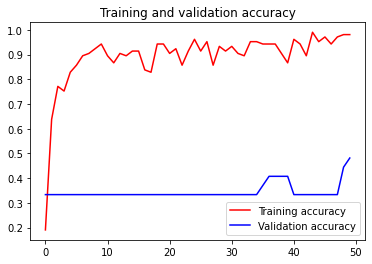

<Figure size 432x288 with 0 Axes>

In [52]:
# Obtenemos el accuracy del modelo
accuracy = history3.history['accuracy']
# Obtenemos el accuracy de validación
validation_accuracy = history3.history['val_accuracy']
# Determinamos los puntos de graficación
epochs = range(len(accuracy))
# Graficamos la metrica del accuracy
plt.plot(epochs, accuracy, 'r', label='Training accuracy')
# Graficamos la metrica del accuracy de validación
plt.plot(epochs, validation_accuracy, 'b', label='Validation accuracy')
# Asignamos el titulo del gráfico
plt.title('Accuracy de entrenamiento y validación')
# Asignamos la legenda del grafico
plt.legend(loc=0)
# Creamos la figura
plt.figure()
# Mostramos la figura
plt.show()

## Predicción mediante el modelo entrenado

In [53]:
# Enviamos los datos de predicción
pred3 = model3.predict(test_ds)
# Tamaño de las predicciones
pred3.shape

(33, 20)

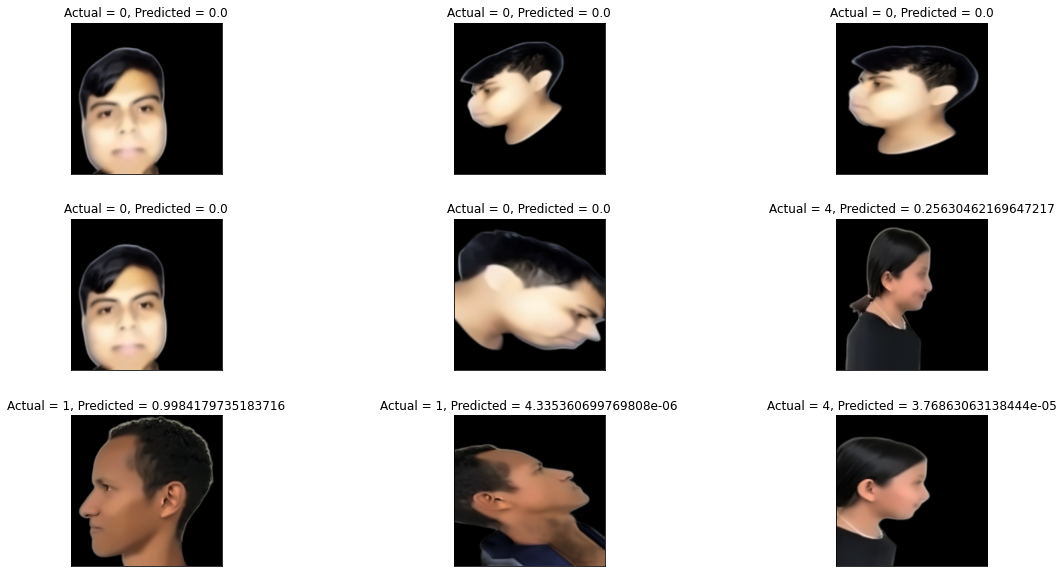

In [54]:
# Definir el tamaño de las figuras
plt.figure(1 , figsize = (19 , 10))
# Definimos un contador
n = 0 
# Bucle para mostrar las imagenes
for i in range(9):
    # Incrementamos el contador
    n += 1 
    # Obtenemos una imagen aleatoria
    r = np.random.randint( 0, test_ds.shape[0], 1)
    # Establecemos la forma de presentar las imagenes
    plt.subplot(3 , 3 , n)
    # Ajustamos la forma de mostrar las imagenes
    plt.subplots_adjust(hspace = 0.3, wspace = 0.3)
    # obtenemos la imagen actual para mostrar
    plt.imshow(test_ds[r[0]])
    # Asignamos las etiquetas
    plt.title('Actual = {}, Predicted = {}'.format(test_labels[r[0]] , test_labels[r[0]]*pred3[r[0]][test_labels[r[0]]]) )
    # Establecemos la medida x, y
    plt.xticks([]) , plt.yticks([])

# Mostramos la gráfica
plt.show()

# Modelo AlexNet CNN - Prueba 4
## Definición de las capas AlexNET CNN

In [56]:
# Instanciamos el modelo
model4=Sequential()

#Agregamos la primera capa convolucional
model4.add(Conv2D(filters=96,kernel_size=(11,11),strides=(4,4),padding="valid",activation="relu",input_shape=(227,227,3)))

#Agregamos la primera capa max pool
model4.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))

# Agregamos la normalización al modelo
model4.add(BatchNormalization())

#Agregamos la segunda capa convolucional
model4.add(Conv2D(filters=256,kernel_size=(5,5),strides=(1,1),padding="valid",activation="relu"))

#Agregamos la tercera capa convolucional
model4.add(Conv2D(filters=256,kernel_size=(5,5),strides=(1,1),padding="valid",activation="relu"))
# Agregamos la normalización al modelo
model4.add(BatchNormalization())

#Agregamos la cuarta capa convolucional
model4.add(Conv2D(filters=384,kernel_size=(3,3),strides=(1,1),padding="valid",activation="relu"))

#Agregamos la quinta capa convolucional
model4.add(Conv2D(filters=384,kernel_size=(3,3),strides=(1,1),padding="valid",activation="relu"))

#Agregamos la sexta capa convolucional
model4.add(Conv2D(filters=256,kernel_size=(3,3),strides=(1,1),padding="valid",activation="relu"))

#Agregamos la septima capa convolucional
model4.add(Conv2D(filters=256,kernel_size=(5,5),strides=(1,1),padding="valid",activation="relu"))
# Agregamos la normalización al modelo
model4.add(BatchNormalization())

# Redimencionamos el modelo
model4.add(Flatten())

#Añadimos la primera capa de densidad
model4.add(Dense(4096,input_shape=(227,227,3),activation="relu"))
# Omitir aleatoriamente neuronas
model4.add(Dropout(0.4))
# Normalizamos el modelo
model4.add(BatchNormalization())

# Añadimos la segunda capa de densidad
model4.add(Dense(4096,activation="relu"))
# Omitir aleatoriamente neuronas
model4.add(Dropout(0.4))
# Normalizamos el modelo
model4.add(BatchNormalization())

# Añadimos la tercera capa de densidad
model4.add(Dense(1000,activation="relu"))
# Omitir aleatoriamente neuronas
model4.add(Dropout(0.4))
# Normalizamos el modelo
model4.add(BatchNormalization())

# Capa de salida
model4.add(Dense(20,activation="softmax"))
# Resumen del modelo
model4.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_56 (Conv2D)          (None, 55, 55, 96)        34944     
                                                                 
 max_pooling2d_38 (MaxPoolin  (None, 27, 27, 96)       0         
 g2D)                                                            
                                                                 
 batch_normalization_51 (Bat  (None, 27, 27, 96)       384       
 chNormalization)                                                
                                                                 
 conv2d_57 (Conv2D)          (None, 23, 23, 256)       614656    
                                                                 
 conv2d_58 (Conv2D)          (None, 19, 19, 256)       1638656   
                                                                 
 batch_normalization_52 (Bat  (None, 19, 19, 256)    

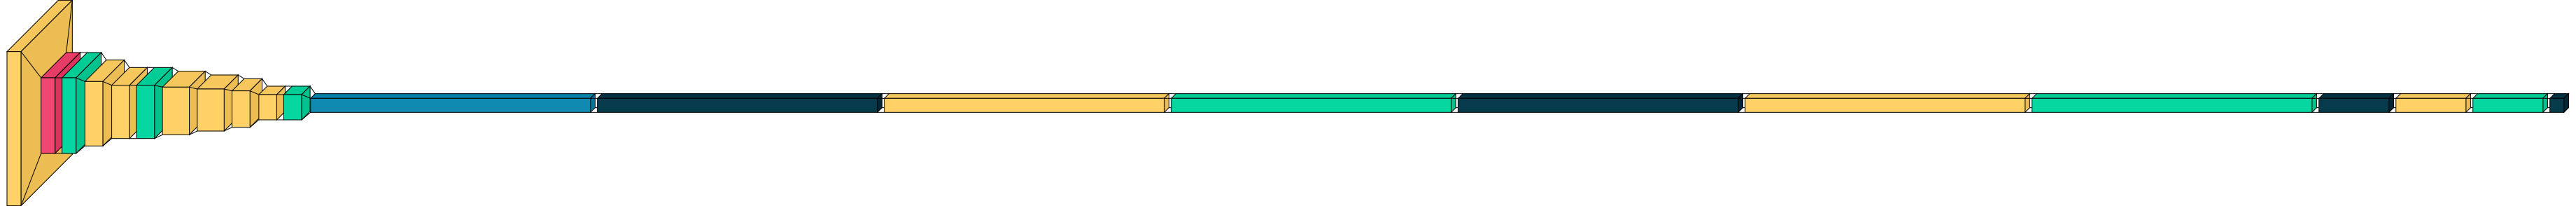

In [57]:
# Grafica del modelo generado
visualkeras.layered_view(model4)

## Compilación del modelo CNN

In [58]:
# Compilamos el modelo
model4.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

## Entrenamiento del modelo

In [59]:
#Marca de tiempo
%time
# Entrenamiento del modelo
history4 = model4.fit(train_ds, train_labels, epochs=50, validation_split=0.2)

Wall time: 0 ns
Epoch 1/50
4/4 [==============================] - 33s 6s/step - loss: 3.0701 - accuracy: 0.2476 - val_loss: 1914.6901 - val_accuracy: 0.3333
Epoch 2/50
4/4 [==============================] - 26s 6s/step - loss: 2.1115 - accuracy: 0.5429 - val_loss: 15611.0107 - val_accuracy: 0.3333
Epoch 3/50
4/4 [==============================] - 25s 6s/step - loss: 1.4778 - accuracy: 0.5810 - val_loss: 12821.3555 - val_accuracy: 0.3333
Epoch 4/50
4/4 [==============================] - 28s 7s/step - loss: 1.4113 - accuracy: 0.5810 - val_loss: 8173.8564 - val_accuracy: 0.3333
Epoch 5/50
4/4 [==============================] - 26s 6s/step - loss: 1.4038 - accuracy: 0.6286 - val_loss: 5289.8179 - val_accuracy: 0.3333
Epoch 6/50
4/4 [==============================] - 24s 6s/step - loss: 1.2057 - accuracy: 0.6190 - val_loss: 2973.6897 - val_accuracy: 0.3333
Epoch 7/50
4/4 [==============================] - 23s 6s/step - loss: 1.3142 - accuracy: 0.5810 - val_loss: 2048.4670 - val_accuracy: 0.

## Evaluación del modelo

In [60]:
# Evaluamos el modelo
loss, accuracy = model4.evaluate(test_ds, test_labels)
# Mostramos los paquetes perdidos y el accuracy
print(loss,accuracy)

2/2 [==============================] - 2s 129ms/step - loss: 3.8096 - accuracy: 0.5455
3.809576988220215 0.5454545617103577


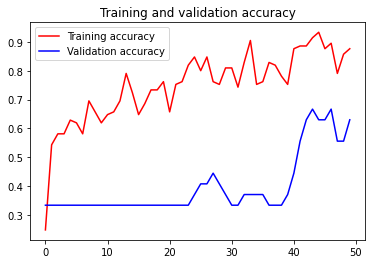

<Figure size 432x288 with 0 Axes>

In [61]:
# Obtenemos el accuracy del modelo
accuracy = history4.history['accuracy']
# Obtenemos el accuracy de validación
validation_accuracy = history4.history['val_accuracy']
# Determinamos los puntos de graficación
epochs = range(len(accuracy))
# Graficamos la metrica del accuracy
plt.plot(epochs, accuracy, 'r', label='Training accuracy')
# Graficamos la metrica del accuracy de validación
plt.plot(epochs, validation_accuracy, 'b', label='Validation accuracy')
# Asignamos el titulo del gráfico
plt.title('Accuracy de entrenamiento y validación')
# Asignamos la legenda del grafico
plt.legend(loc=0)
# Creamos la figura
plt.figure()
# Mostramos la figura
plt.show()

## Predicción mediante el modelo entrenado

In [62]:
# Enviamos los datos de predicción
pred4 = model4.predict(test_ds)
# Tamaño de las predicciones
pred4.shape

(33, 20)

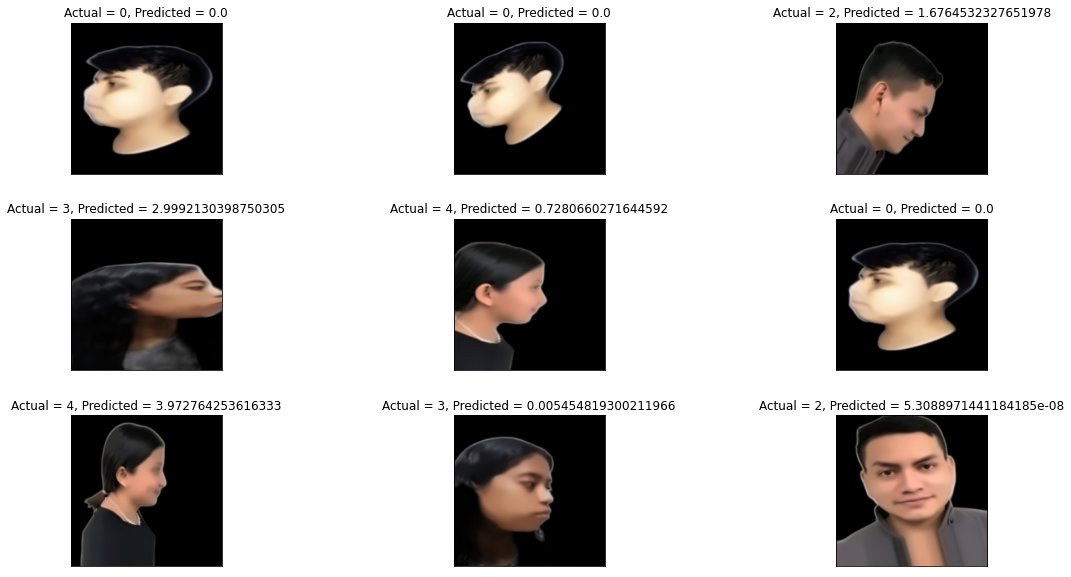

In [63]:
# Definir el tamaño de las figuras
plt.figure(1 , figsize = (19 , 10))
# Definimos un contador
n = 0 
# Bucle para mostrar las imagenes
for i in range(9):
    # Incrementamos el contador
    n += 1 
    # Obtenemos una imagen aleatoria
    r = np.random.randint( 0, test_ds.shape[0], 1)
    # Establecemos la forma de presentar las imagenes
    plt.subplot(3 , 3 , n)
    # Ajustamos la forma de mostrar las imagenes
    plt.subplots_adjust(hspace = 0.3, wspace = 0.3)
    # obtenemos la imagen actual para mostrar
    plt.imshow(test_ds[r[0]])
    # Asignamos las etiquetas
    plt.title('Actual = {}, Predicted = {}'.format(test_labels[r[0]] , test_labels[r[0]]*pred4[r[0]][test_labels[r[0]]]) )
    # Establecemos la medida x, y
    plt.xticks([]) , plt.yticks([])

# Mostramos la gráfica
plt.show()

# Modelo AlexNet CNN - Prueba 5
## Definición de las capas AlexNET CNN

In [65]:
# Instanciamos el modelo
model5=Sequential()

#Agregamos la primera capa convolucional
model5.add(Conv2D(filters=96,kernel_size=(11,11),strides=(4,4),padding="valid",activation="relu",input_shape=(227,227,3)))

#Agregamos la primera capa max pool
model5.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))

# Agregamos la normalización al modelo
model5.add(BatchNormalization())

#Agregamos la segunda capa convolucional
model5.add(Conv2D(filters=256,kernel_size=(5,5),strides=(1,1),padding="valid",activation="relu"))

#Agregamos la tercera capa convolucional
model5.add(Conv2D(filters=384,kernel_size=(3,3),strides=(1,1),padding="valid",activation="relu"))

#Agregamos la cuarta capa convolucional
model5.add(Conv2D(filters=384,kernel_size=(3,3),strides=(1,1),padding="valid",activation="relu"))

#Agregamos la quinta capa convolucional
model5.add(Conv2D(filters=256,kernel_size=(3,3),strides=(1,1),padding="valid",activation="relu"))


#Agregamos la segunda capa max pool
model5.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))
# Agregamos la normalización al modelo
model5.add(BatchNormalization())

#Agregamos la tercera capa max pool
model5.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))
# Agregamos la normalización al modelo
model5.add(BatchNormalization())

# Redimencionamos el modelo
model5.add(Flatten())

#Añadimos la primera capa de densidad
model5.add(Dense(4096,input_shape=(227,227,3),activation="relu"))
# Omitir aleatoriamente neuronas
model5.add(Dropout(0.4))
# Normalizamos el modelo
model5.add(BatchNormalization())

# Añadimos la segunda capa de densidad
model5.add(Dense(4096,activation="relu"))
# Omitir aleatoriamente neuronas
model5.add(Dropout(0.4))
# Normalizamos el modelo
model5.add(BatchNormalization())

# Añadimos la tercera capa de densidad
model5.add(Dense(1000,activation="relu"))
# Omitir aleatoriamente neuronas
model5.add(Dropout(0.4))
# Normalizamos el modelo
model5.add(BatchNormalization())

# Capa de salida
model5.add(Dense(20,activation="softmax"))
# Resumen del modelo
model5.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_68 (Conv2D)          (None, 55, 55, 96)        34944     
                                                                 
 max_pooling2d_42 (MaxPoolin  (None, 27, 27, 96)       0         
 g2D)                                                            
                                                                 
 batch_normalization_60 (Bat  (None, 27, 27, 96)       384       
 chNormalization)                                                
                                                                 
 conv2d_69 (Conv2D)          (None, 23, 23, 256)       614656    
                                                                 
 conv2d_70 (Conv2D)          (None, 21, 21, 384)       885120    
                                                                 
 conv2d_71 (Conv2D)          (None, 19, 19, 384)     

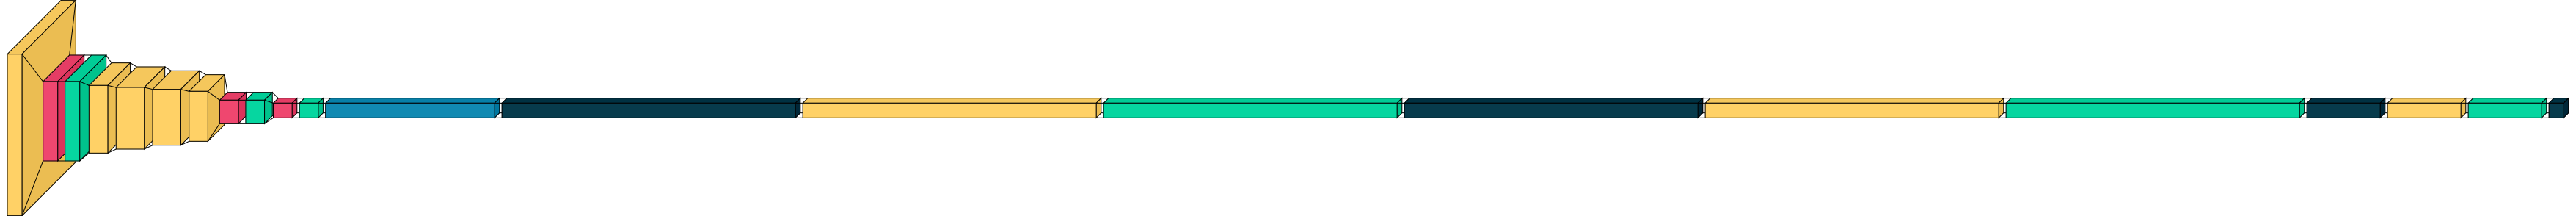

In [66]:
# Grafica del modelo generado
visualkeras.layered_view(model5)

## Compilación del modelo CNN

In [67]:
# Compilamos el modelo
model5.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

## Entrenamiento del modelo

In [68]:
#Marca de tiempo
%time
# Entrenamiento del modelo
history5 = model5.fit(train_ds, train_labels, epochs=50, validation_split=0.2)

Wall time: 0 ns
Epoch 1/50
4/4 [==============================] - 22s 4s/step - loss: 3.2806 - accuracy: 0.2286 - val_loss: 73.5465 - val_accuracy: 0.3333
Epoch 2/50
4/4 [==============================] - 16s 4s/step - loss: 2.1963 - accuracy: 0.4381 - val_loss: 500.1199 - val_accuracy: 0.3333
Epoch 3/50
4/4 [==============================] - 15s 3s/step - loss: 1.4131 - accuracy: 0.6667 - val_loss: 966.0396 - val_accuracy: 0.3333
Epoch 4/50
4/4 [==============================] - 15s 4s/step - loss: 0.8941 - accuracy: 0.7524 - val_loss: 958.2806 - val_accuracy: 0.3333
Epoch 5/50
4/4 [==============================] - 15s 3s/step - loss: 1.0118 - accuracy: 0.6952 - val_loss: 745.0813 - val_accuracy: 0.3333
Epoch 6/50
4/4 [==============================] - 15s 4s/step - loss: 0.7022 - accuracy: 0.8095 - val_loss: 547.7167 - val_accuracy: 0.3333
Epoch 7/50
4/4 [==============================] - 15s 4s/step - loss: 0.7806 - accuracy: 0.7905 - val_loss: 476.7703 - val_accuracy: 0.3333
Epoch

## Evaluación del modelo

In [70]:
# Evaluamos el modelo
loss, accuracy = model5.evaluate(test_ds, test_labels)
# Mostramos los paquetes perdidos y el accuracy
print(loss,accuracy)

2/2 [==============================] - 1s 95ms/step - loss: 12.3987 - accuracy: 0.2121
12.398687362670898 0.21212121844291687


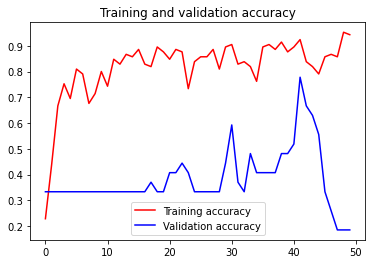

<Figure size 432x288 with 0 Axes>

In [71]:
# Obtenemos el accuracy del modelo
accuracy = history5.history['accuracy']
# Obtenemos el accuracy de validación
validation_accuracy = history5.history['val_accuracy']
# Determinamos los puntos de graficación
epochs = range(len(accuracy))
# Graficamos la metrica del accuracy
plt.plot(epochs, accuracy, 'r', label='Training accuracy')
# Graficamos la metrica del accuracy de validación
plt.plot(epochs, validation_accuracy, 'b', label='Validation accuracy')
# Asignamos el titulo del gráfico
plt.title('Accuracy de entrenamiento y validación')
# Asignamos la legenda del grafico
plt.legend(loc=0)
# Creamos la figura
plt.figure()
# Mostramos la figura
plt.show()

## Predicción mediante el modelo entrenado

In [72]:
# Enviamos los datos de predicción
pred5 = model5.predict(test_ds)
# Tamaño de las predicciones
pred5.shape

(33, 20)

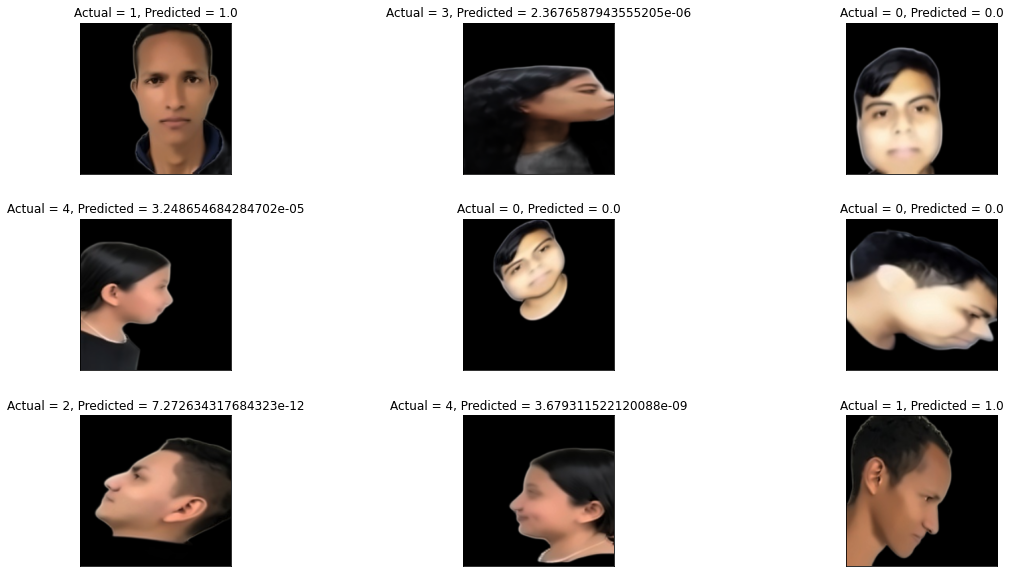

In [73]:
# Definir el tamaño de las figuras
plt.figure(1 , figsize = (19 , 10))
# Definimos un contador
n = 0 
# Bucle para mostrar las imagenes
for i in range(9):
    # Incrementamos el contador
    n += 1 
    # Obtenemos una imagen aleatoria
    r = np.random.randint( 0, test_ds.shape[0], 1)
    # Establecemos la forma de presentar las imagenes
    plt.subplot(3 , 3 , n)
    # Ajustamos la forma de mostrar las imagenes
    plt.subplots_adjust(hspace = 0.3, wspace = 0.3)
    # obtenemos la imagen actual para mostrar
    plt.imshow(test_ds[r[0]])
    # Asignamos las etiquetas
    plt.title('Actual = {}, Predicted = {}'.format(test_labels[r[0]] , test_labels[r[0]]*pred5[r[0]][test_labels[r[0]]]) )
    # Establecemos la medida x, y
    plt.xticks([]) , plt.yticks([])

# Mostramos la gráfica
plt.show()

## Análisis de resultados

Mediante las diferentes pruebas realizadas, logramos identificar que la arquitectura AlexNet original es la que mejores resultados obtiene y la que completa su entrenamiento en la menor cantidad de tiempo, siendo la más optima a ser implementada.